<a href="https://colab.research.google.com/github/Ming947/Iteration4/blob/main/Iteration4_BDAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Iteration 4: Data Mining with PySpark

Student Name: Mingming Liu

Student Number: 428555818


In [1]:
# =============================================================================
# Environment Setup and SparkSession Initialization
# =============================================================================
!pip install pyspark

from pyspark.sql import SparkSession
import pyspark.sql.functions as F

spark = SparkSession.builder \
    .appName("DiabetesRiskPrediction") \
    .master("local[*]") \
    .getOrCreate()

print("PySpark Environment Setup!")
print(f"Spark Version: {spark.version}")


PySpark Environment Setup!
Spark Version: 3.5.1


## Step 1: Business Understanding
The global burden of diabetes is a significant and escalating public health issue, impacting well-being and posing substantial economic challenges, which directly relates to the UN's Sustainable Development Goal 3 (Good Health and Well-being). A key challenge is the lack of public awareness regarding modifiable risk factors, leading to many undiagnosed or untreated cases. This project's primary objective is to use the PySpark big data framework to analyze demographic, lifestyle, and health-related factors that are most predictive of diabetes, thereby enhancing the understanding of its key drivers.

By analyzing the comprehensive CDC health indicator dataset, we will develop a binary classification model to predict an individual's risk of diabetes. The ultimate goal is to generate clear, actionable insights that can support public health organizations in developing targeted prevention strategies, improving early detection efforts, and promoting better health outcomes for at-risk populations. This iteration specifically leverages PySpark to handle the large dataset efficiently and build a scalable data processing and machine learning pipeline.

## Step 2: Data Understanding

In [2]:
# =============================================================================
# 2.1 Loading and Exploring the CDC Diabetes Indicators Dataset
# =============================================================================

file_path_cdc = '/content/drive/MyDrive/Colab Notebooks/Dataset-diabetes_indicators.csv'
file_path_early_stage = '/content/drive/MyDrive/Colab Notebooks/Dataset-diabetes_prediction.csv'

# --- Section for CDC Dataset ---
print("\n" + "="*50)
print("Processing: CDC Diabetes Health Indicators Dataset")
print("="*50)

# 2. Load the CDC dataset
# header=True uses the first row as columns' names
# inferSchema=True automatically infers the data types
df_cdc = spark.read.csv(file_path_cdc, header=True, inferSchema=True)

# 3. Describe the CDC data (equivalent to pandas shape and info)
print("\n--- Describing CDC Data ---")

# Get and print row and column counts (equivalent to df.shape)
row_count_cdc = df_cdc.count()
column_count_cdc = len(df_cdc.columns)
print(f"The CDC dataset has {row_count_cdc} rows and {column_count_cdc} columns.")

# Print the schema (main equivalent to df.info() for data types)
print("\nSchema of the CDC dataset:")
df_cdc.printSchema()

# Preview the first 5 rows (equivalent to df.head())
print("\nPreview of the first 5 rows of the CDC dataset:")
df_cdc.show(5)



Processing: CDC Diabetes Health Indicators Dataset

--- Describing CDC Data ---
The CDC dataset has 253680 rows and 22 columns.

Schema of the CDC dataset:
root
 |-- Diabetes_binary: integer (nullable = true)
 |-- HighBP: integer (nullable = true)
 |-- HighChol: integer (nullable = true)
 |-- CholCheck: integer (nullable = true)
 |-- BMI: integer (nullable = true)
 |-- Smoker: integer (nullable = true)
 |-- Stroke: integer (nullable = true)
 |-- HeartDiseaseorAttack: integer (nullable = true)
 |-- PhysActivity: integer (nullable = true)
 |-- Fruits: integer (nullable = true)
 |-- Veggies: integer (nullable = true)
 |-- HvyAlcoholConsump: integer (nullable = true)
 |-- AnyHealthcare: integer (nullable = true)
 |-- NoDocbcCost: integer (nullable = true)
 |-- GenHlth: integer (nullable = true)
 |-- MentHlth: integer (nullable = true)
 |-- PhysHlth: integer (nullable = true)
 |-- DiffWalk: integer (nullable = true)
 |-- Sex: integer (nullable = true)
 |-- Age: integer (nullable = true)
 |

In [3]:
# =============================================================================
# 2.2 Loading and Exploring the Early Stage Diabetes Risk Prediction Dataset
# =============================================================================

print("\n" + "="*50)
print("Processing: Early Stage Diabetes Risk Prediction Dataset")
print("="*50)

# Load the Early Stage dataset
df_early = spark.read.csv(file_path_early_stage, header=True, inferSchema=True)

# Describe the Early Stage data
row_count_early = df_early.count()
column_count_early = len(df_early.columns)
print(f"The Early Stage dataset has {row_count_early} rows and {column_count_early} columns.")

print("\nSchema of the Early Stage dataset:")
df_early.printSchema()

print("\nPreview of the first 5 rows of the Early Stage dataset:")
df_early.show(5)



Processing: Early Stage Diabetes Risk Prediction Dataset
The Early Stage dataset has 520 rows and 17 columns.

Schema of the Early Stage dataset:
root
 |-- Age: integer (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Polyuria: string (nullable = true)
 |-- Polydipsia: string (nullable = true)
 |-- sudden weight loss: string (nullable = true)
 |-- weakness: string (nullable = true)
 |-- Polyphagia: string (nullable = true)
 |-- Genital thrush: string (nullable = true)
 |-- visual blurring: string (nullable = true)
 |-- Itching: string (nullable = true)
 |-- Irritability: string (nullable = true)
 |-- delayed healing: string (nullable = true)
 |-- partial paresis: string (nullable = true)
 |-- muscle stiffness: string (nullable = true)
 |-- Alopecia: string (nullable = true)
 |-- Obesity: string (nullable = true)
 |-- class: string (nullable = true)


Preview of the first 5 rows of the Early Stage dataset:
+---+------+--------+----------+------------------+--------+--------


--- Generating Visualizations for the CDC Dataset ---
Selecting required columns from CDC Spark DataFrame and converting to Pandas...
Conversion successful. Generating plots...


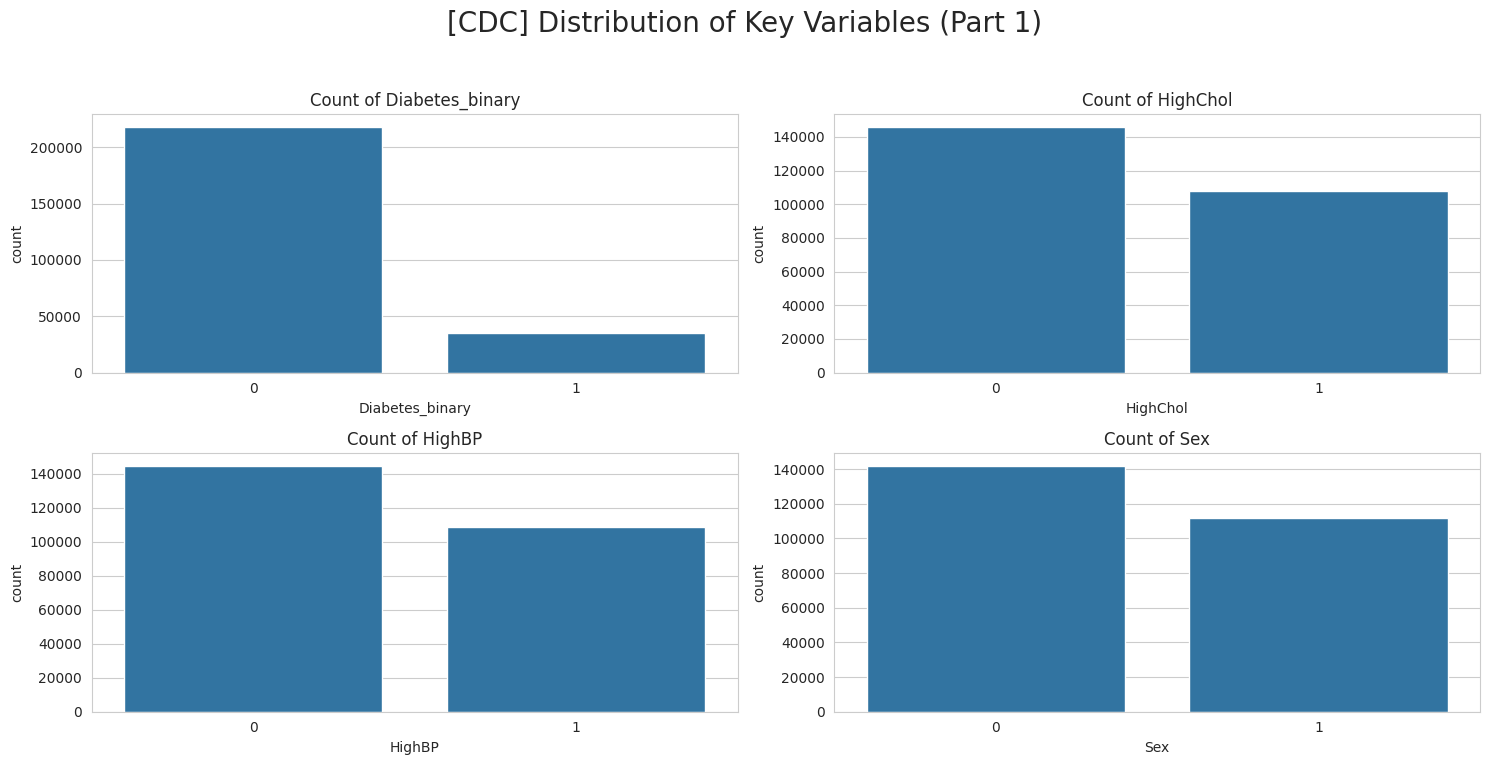

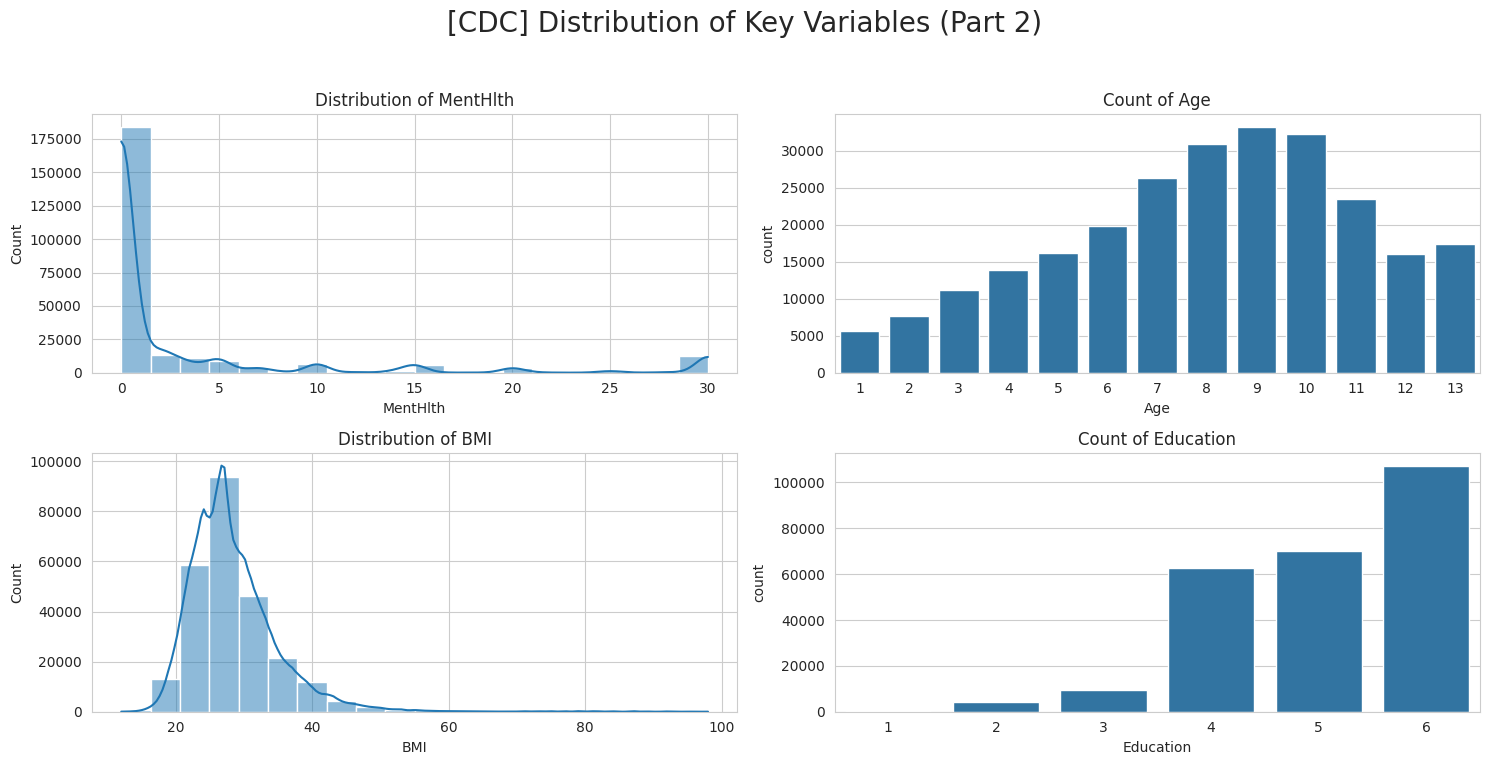

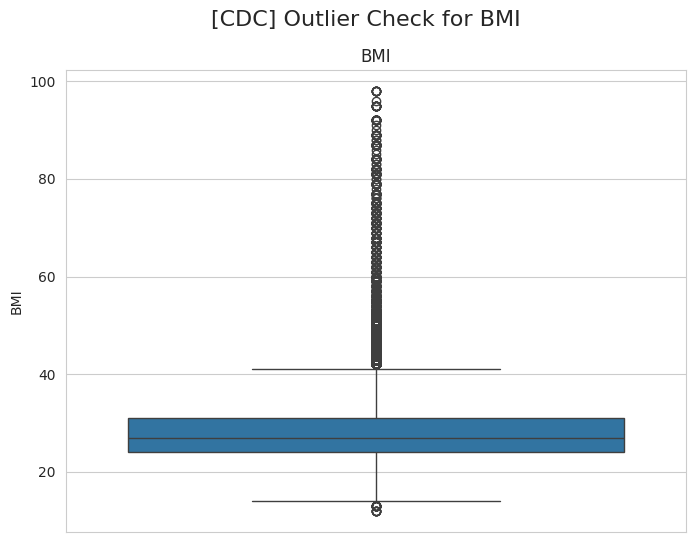

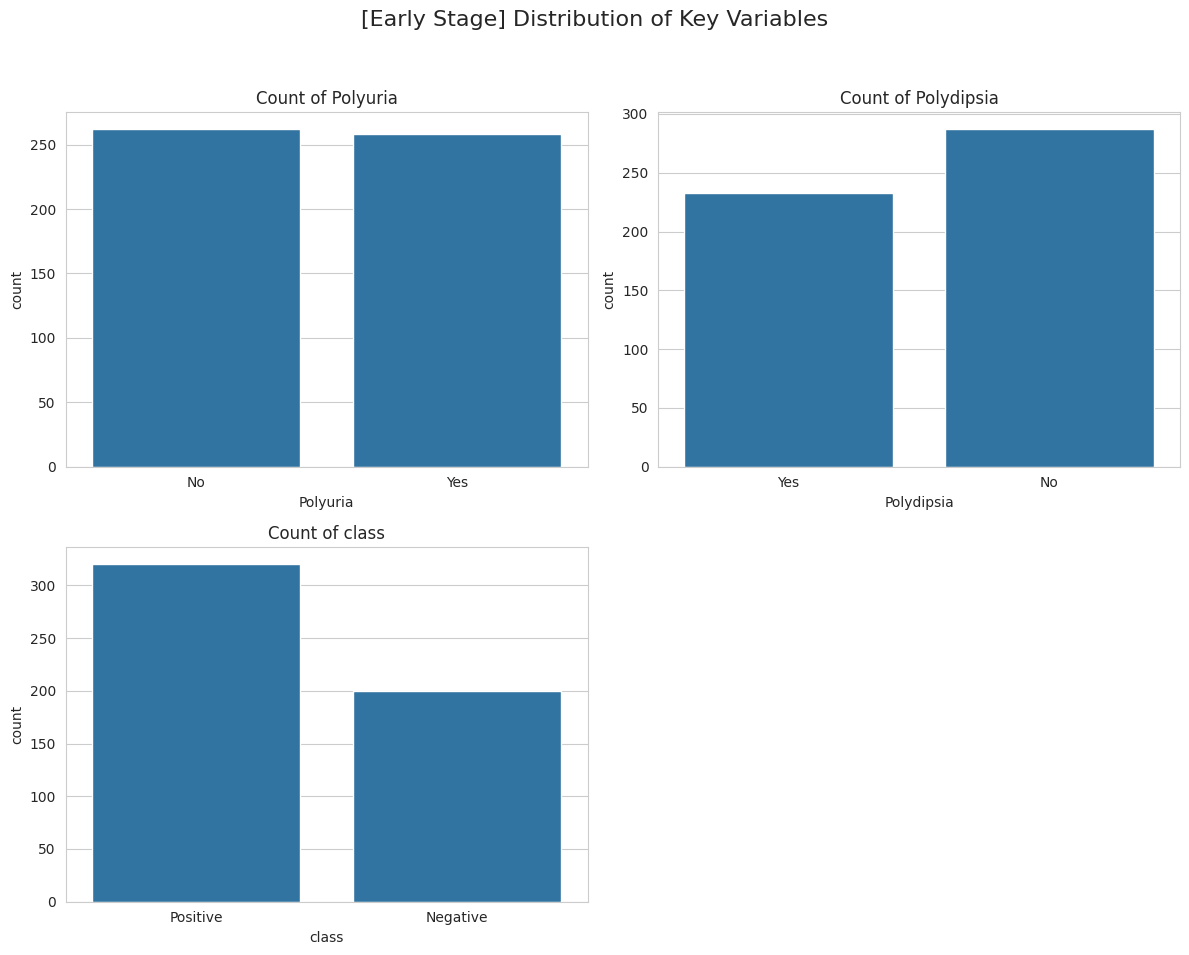

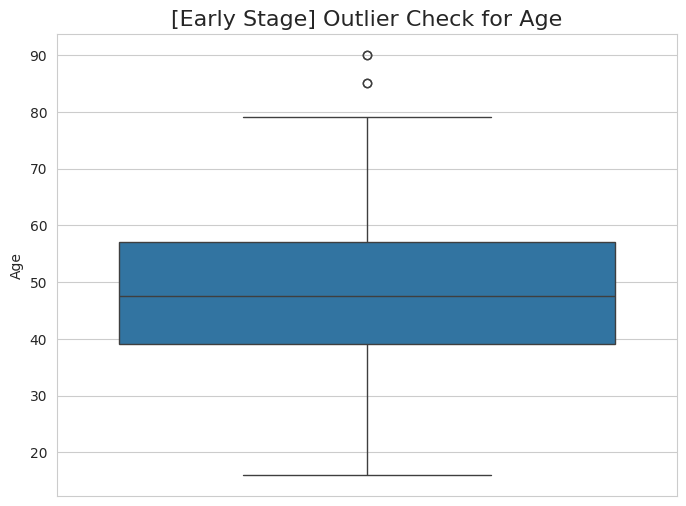

In [4]:
# =============================================================================
# 2.3 Distribution Plots
# =============================================================================

import matplotlib.pyplot as plt
import seaborn as sns
import math

# Set plotting style for all subsequent plots
sns.set_style("whitegrid")


# --- Visualizations for the CDC Diabetes Indicators Dataset ---

print("\n" + "="*50)
print("--- Generating Visualizations for the CDC Dataset ---")
print("="*50)

# Select only the columns needed for plotting and convert to Pandas
print("Selecting required columns from CDC Spark DataFrame and converting to Pandas...")
cdc_vars_to_plot = ['Diabetes_binary', 'HighChol', 'HighBP', 'Sex', 'MentHlth', 'Age', 'BMI', 'Education']
df_cdc_pd = df_cdc.select(cdc_vars_to_plot).toPandas()
print("Conversion successful. Generating plots...")

plots_per_figure = 4
num_plots_total = len(cdc_vars_to_plot)

# Loop through the list of variables in chunks
for i in range(0, num_plots_total, plots_per_figure):
    # Get the variables for the current figure
    vars_chunk = cdc_vars_to_plot[i : i + plots_per_figure]

    # Create a new figure for this chunk with a 2x2 grid (max 4 plots)
    fig, axes = plt.subplots(2, 2, figsize=(15, 8))
    axes = axes.flatten() # Flatten the 2x2 grid to a 1D array for easy iteration
    fig.suptitle(f'[CDC] Distribution of Key Variables (Part {i//plots_per_figure + 1})', fontsize=20)

    # Plot each variable in the current chunk onto the new figure
    for j, var in enumerate(vars_chunk):
        ax = axes[j]
        if df_cdc_pd[var].nunique() > 15:
            sns.histplot(df_cdc_pd[var], kde=True, ax=ax, bins=20)
            ax.set_title(f'Distribution of {var}')
        else:
            sns.countplot(x=var, data=df_cdc_pd, ax=ax)
            ax.set_title(f'Count of {var}')

    # Hide any unused subplots in the last figure
    for j in range(len(vars_chunk), len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show() # Display the figure for the current chunk

# --- Boxplot for CDC BMI Outlier Check (this part remains the same) ---
fig, axes = plt.subplots(figsize=(8, 6))
fig.suptitle('[CDC] Outlier Check for BMI', fontsize=16)
sns.boxplot(y='BMI', data=df_cdc_pd).set_title('BMI')
plt.show()

# --- Visualizations for the Early Stage Diabetes Prediction Dataset ---
df_early_pd = df_early.toPandas()
early_vars_to_plot = ['Polyuria', 'Polydipsia', 'class']

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('[Early Stage] Distribution of Key Variables', fontsize=16)

axes = axes.flatten()

for i, var in enumerate(early_vars_to_plot):
    sns.countplot(x=var, data=df_early_pd, ax=axes[i])
    axes[i].set_title(f'Count of {var}')

axes[3].set_visible(False)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show() # Display the single figure with all subplots


# The Boxplot for Age remains a separate plot
plt.figure(figsize=(8, 6))
sns.boxplot(y='Age', data=df_early_pd)
plt.title('[Early Stage] Outlier Check for Age', fontsize=16)
plt.show()


## Step 3: Data Preparation

In [5]:
# =============================================================================
# Part 3: Data Preparation
# =============================================================================

from pyspark.sql.functions import col, when, lit, sum as _sum
from pyspark.sql.types import IntegerType, StringType
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler

print("--- Starting Step 3: Data Preparation ---")

# --- 3.1 Preparing the CDC Diabetes Indicators Dataset ---
print("\n--- 3.1 Preparing the CDC Dataset ---")

# In PySpark, transformations create a new DataFrame, so we'll reassign it.
df_cdc_prepared = df_cdc

# 3.1.1 Feature Selection
columns_to_drop_cdc = ['CholCheck', 'HvyAlcoholConsump']
df_cdc_prepared = df_cdc_prepared.drop(*columns_to_drop_cdc) # Use * to unpack the list
print(f"CDC Dataset: Dropped columns: {columns_to_drop_cdc}")

# 3.1.2 Handling Outliers and Extreme Values (Capping at 99th percentile)
# In PySpark, we use approxQuantile for distributed calculation
print("CDC Dataset: Calculating 99th percentiles for capping...")
cols_to_cap = ['BMI', 'PhysHlth', 'MentHlth']
for c in cols_to_cap:
    # approxQuantile returns a list, we need the first element
    percentile_99 = df_cdc_prepared.approxQuantile(c, [0.99], 0.001)[0]
    print(f"  - 99th percentile for {c}: {percentile_99}")
    df_cdc_prepared = df_cdc_prepared.withColumn(c,
        when(col(c) > percentile_99, percentile_99).otherwise(col(c))
    )
print("CDC Dataset: Capped outliers for BMI, PhysHlth, MentHlth.")

# 3.1.3 Standardize Column Names - No change needed

# 3.1.4 Create New Feature: Health_Risk_Score
risk_factors = ['HighBP', 'HighChol', 'Stroke', 'HeartDiseaseorAttack']
df_cdc_prepared = df_cdc_prepared.withColumn('Health_Risk_Score',
                                             col('HighBP') + col('HighChol') +
                                             col('Stroke') + col('HeartDiseaseorAttack'))
print("CDC Dataset: Created 'Health_Risk_Score' feature.")

# 3.1.5 Create New Feature: BMI_Category
df_cdc_prepared = df_cdc_prepared.withColumn('BMI_Category',
    when(col('BMI') < 18.5, "Underweight")
    .when((col('BMI') >= 18.5) & (col('BMI') < 25.0), "Normal_Weight")
    .when((col('BMI') >= 25.0) & (col('BMI') < 30.0), "Overweight")
    .otherwise("Obese")
)
print("CDC Dataset: Created 'BMI_Category' feature.")

# 3.1.6 Add Data Source Information
# Use the lit() function to add a literal/constant value column
df_cdc_prepared = df_cdc_prepared.withColumn('DataSource', lit('CDC'))
print("CDC Dataset: Added 'DataSource' column.")


# --- 3.2 Preparing the Early Stage Diabetes Prediction Dataset ---
print("\n--- 3.2 Preparing the Early Stage Diabetes Dataset ---")

df_early_prepared = df_early

df_early_prepared = df_early_prepared.withColumnRenamed('sudden weight loss', 'sudden_weight_loss') \
                                     .withColumnRenamed('Genital thrush', 'Genital_thrush') \
                                     .withColumnRenamed('visual blurring', 'visual_blurring') \
                                     .withColumnRenamed('delayed healing', 'delayed_healing') \
                                     .withColumnRenamed('partial paresis', 'partial_paresis') \
                                     .withColumnRenamed('muscle stiffness', 'muscle_stiffness')

# 3.2.1 Standardize Column Names and Values
# Rename columns
df_early_prepared = df_early_prepared.withColumnRenamed('Gender', 'Sex').withColumnRenamed('class', 'Diabetes_binary')

# Map string values to integers using 'when' expressions
df_early_prepared = df_early_prepared.withColumn('Sex',
    when(col('Sex') == 'Male', 1).otherwise(0).cast(IntegerType())
)
df_early_prepared = df_early_prepared.withColumn('Diabetes_binary',
    when(col('Diabetes_binary') == 'Positive', 1).otherwise(0).cast(IntegerType())
)

# Map all other object/string columns from 'Yes'/'No' to 1/0
string_cols_to_map = [c.name for c in df_early_prepared.schema.fields if isinstance(c.dataType, StringType)]
for c in string_cols_to_map:
    df_early_prepared = df_early_prepared.withColumn(c,
        when(col(c) == 'Yes', 1).otherwise(0).cast(IntegerType())
    )
print("Early Stage Dataset: Standardized column names and values.")

from functools import reduce
from operator import add

# 3.2.2 Create New Feature: Symptom_Count
symptom_columns = ['Polyuria', 'Polydipsia', 'sudden_weight_loss', 'weakness', 'Polyphagia',
                   'Genital_thrush', 'visual_blurring', 'Itching', 'Irritability',
                   'delayed_healing', 'partial_paresis', 'muscle_stiffness', 'Alopecia']
df_early_prepared = df_early_prepared.withColumn('Symptom_Count', reduce(add, [col(c) for c in symptom_columns]))
print("Early Stage Dataset: Created 'Symptom_Count' feature.")

# 3.2.3 Add Data Source Information
df_early_prepared = df_early_prepared.withColumn('DataSource', lit('EarlyStage'))
print("Early Stage Dataset: Added 'DataSource' column.")


# --- 3.3 Merging Datasets and Assessing Feasibility ---
print("\n--- 3.3 Merging Datasets and Handling Nulls ---")
df_merged = df_cdc_prepared.unionByName(df_early_prepared, allowMissingColumns=True)
print(f"Merged dataset created with {df_merged.count()} rows.")

cols_to_fill_zero = symptom_columns + ['Symptom_Count']
df_merged_filled = df_merged.na.fill(0, subset=cols_to_fill_zero)
cols_to_fill_zero_cdc = ['Health_Risk_Score', 'BMI', 'HighBP', 'HighChol', 'Stroke',
                         'HeartDiseaseorAttack', 'Smoker', 'PhysActivity', 'Fruits',
                         'Veggies', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth',
                         'PhysHlth', 'DiffWalk', 'Age', 'Education', 'Income']
df_merged_filled = df_merged_filled.na.fill(0, subset=cols_to_fill_zero_cdc)
df_merged_filled = df_merged_filled.na.fill("Unknown", subset=['BMI_Category'])

print("Filled null values resulting from the merge.")

# --- 3.4 Train-Test Split ---
print("\n--- 3.4 Train-Test Split ---")
(trainingData, testData) = df_merged_filled.randomSplit([0.7, 0.3], seed=42)
print(f"Data split into training and testing sets.")
print(f"Training set count: {trainingData.count()}, Testing set count: {testData.count()}")
trainingData.cache()
testData.cache()

# --- 3.5 Data Balancing (Oversampling for Iteration A on TRAINING DATA) ---
print("\n--- 3.5 Data Balancing (Oversampling on Training Data) ---")

print("Class distribution in TRAINING data before balancing:")
trainingData.groupBy('Diabetes_binary').count().show()

minority_df_train = trainingData.filter(col("Diabetes_binary") == 1)
majority_df_train = trainingData.filter(col("Diabetes_binary") == 0)

minority_count_train = minority_df_train.count()
majority_count_train = majority_df_train.count()
print(f"Training Minority class count: {minority_count_train}, Training Majority class count: {majority_count_train}")

if minority_count_train > 0:
    oversample_ratio = majority_count_train / minority_count_train
    oversampled_minority_df = minority_df_train.sample(withReplacement=True, fraction=oversample_ratio, seed=42)

    df_balanced = majority_df_train.unionAll(oversampled_minority_df)

    print("\nClass distribution in TRAINING data after balancing:")
    df_balanced.groupBy('Diabetes_binary').count().show()
    print(f"Total samples in balanced training dataset: {df_balanced.count()}")
else:
    print("Minority class has no samples in training data, skipping balancing.")
    df_balanced = trainingData

# --- 3.6 Final Preparation for Modeling (Fit on Train, Transform Both) ---
print("\n--- 3.6 Final Preparation for Modeling ---")

# 1. & 2. FITTING and TRANSFORMING with Indexer and Encoder
print("Step 1 & 2: Applying StringIndexer and OneHotEncoder...")
stringIndexer = StringIndexer(inputCol="BMI_Category", outputCol="BMI_Category_Index", handleInvalid="keep")
model_indexer = stringIndexer.fit(df_balanced)
df_indexed_train = model_indexer.transform(df_balanced)
df_indexed_test = model_indexer.transform(testData)

encoder = OneHotEncoder(inputCol="BMI_Category_Index", outputCol="BMI_Category_Vec", dropLast=True)
model_encoder = encoder.fit(df_indexed_train)
df_encoded_train = model_encoder.transform(df_indexed_train)
df_encoded_test = model_encoder.transform(df_indexed_test)

df_encoded_train = df_encoded_train.withColumn("Obesity_clean",
                                               when(col("Obesity") == 1, 1).otherwise(0)) \
                                      .drop("Obesity") \
                                      .withColumnRenamed("Obesity_clean", "Obesity")
df_encoded_test = df_encoded_test.withColumn("Obesity_clean",
                                             when(col("Obesity") == 1, 1).otherwise(0)) \
                                    .drop("Obesity") \
                                    .withColumnRenamed("Obesity_clean", "Obesity")

# 3. Define the VectorAssembler's input columns AFTER all transformations
print("Step 3: Defining feature list and assembling vectors...")

feature_columns = [
    'Age', 'BMI', 'HighBP', 'HighChol', 'Smoker',
    'Stroke', 'HeartDiseaseorAttack', 'PhysActivity',
    'Fruits', 'Veggies', 'Health_Risk_Score',
    'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
    'MentHlth', 'PhysHlth', 'DiffWalk',
    'Education', 'Income', 'Sex', 'Polyuria',
    'Polydipsia', 'sudden_weight_loss', 'weakness',
    'Polyphagia', 'Genital_thrush', 'visual_blurring',
    'Itching', 'Irritability', 'delayed_healing',
    'partial_paresis', 'muscle_stiffness', 'Alopecia',
    'Obesity', 'Symptom_Count', 'BMI_Category_Vec'
]

assembler = VectorAssembler(
    inputCols=feature_columns,
    outputCol="features"
)

# 4. TRANSFORM both dataframes using the assembler
df_prepared = assembler.transform(df_encoded_train).select("features", col("Diabetes_binary").alias("label"))
df_prepared_test = assembler.transform(df_encoded_test).select("features", col("Diabetes_binary").alias("label"))

print("\nDataset prepared for modeling.")
print("Final prepared TRAINING DataFrame schema:")
df_prepared.printSchema()

print("\nPreview of the final prepared TRAINING data:")
df_prepared.show(5, truncate=False)

print("\nPreview of the final prepared TESTING data:")
df_prepared_test.show(5, truncate=False)

--- Starting Step 3: Data Preparation ---

--- 3.1 Preparing the CDC Dataset ---
CDC Dataset: Dropped columns: ['CholCheck', 'HvyAlcoholConsump']
CDC Dataset: Calculating 99th percentiles for capping...
  - 99th percentile for BMI: 49.0
  - 99th percentile for PhysHlth: 30.0
  - 99th percentile for MentHlth: 30.0
CDC Dataset: Capped outliers for BMI, PhysHlth, MentHlth.
CDC Dataset: Created 'Health_Risk_Score' feature.
CDC Dataset: Created 'BMI_Category' feature.
CDC Dataset: Added 'DataSource' column.

--- 3.2 Preparing the Early Stage Diabetes Dataset ---
Early Stage Dataset: Standardized column names and values.
Early Stage Dataset: Created 'Symptom_Count' feature.
Early Stage Dataset: Added 'DataSource' column.

--- 3.3 Merging Datasets and Handling Nulls ---
Merged dataset created with 254200 rows.
Filled null values resulting from the merge.

--- 3.4 Train-Test Split ---
Data split into training and testing sets.
Training set count: 177981, Testing set count: 76219

--- 3.5 Data 

## Step 4: Data Transformation

In [6]:
# =============================================================================
# Part 4: Data Transformation
# =============================================================================

from pyspark.ml.feature import ChiSqSelector, VectorAssembler, StandardScaler, PCA
from pyspark.ml import Pipeline

print("--- Starting Step 4: Data Transformation ---")

# --- 4.1 Define Feature Groups ---
# Define numerical and categorical features from the encoded training set.
# NOTE: The input DataFrame for this step is df_encoded_train.

# Define numerical features
numerical_features = ['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education',
                      'Income', 'Health_Risk_Score', 'Symptom_Count']

# Categorical features are all columns except for non-features and numerical features
cols_to_exclude = ['Diabetes_binary', 'BMI_Category', 'BMI_Category_Index',
                   'DataSource', 'BMI_Category_Vec'] + numerical_features
categorical_features = [c for c in df_encoded_train.columns if c not in cols_to_exclude]

print(f"Identified {len(numerical_features)} numerical features.")
print(f"Identified {len(categorical_features)} categorical features for selection.")


# --- 4.2 Build the Full Transformation Pipeline ---
print("\n--- 4.2 Building the Full Transformation Pipeline ---")

# Stage 1: Categorical Feature Selection
# First, assemble all categorical features into a single vector.
assembler_cat = VectorAssembler(inputCols=categorical_features, outputCol="categorical_features_vec")
# Then, use ChiSqSelector to select the top 8 most important features.
selector = ChiSqSelector(numTopFeatures=8, featuresCol="categorical_features_vec",
                         outputCol="selected_categorical_features", labelCol="Diabetes_binary")

# Stage 2: Numerical Feature Transformation
# Assemble all numerical features into a single vector.
assembler_num = VectorAssembler(inputCols=numerical_features, outputCol="numerical_features_vec")
# Standardize the numerical features.
scaler = StandardScaler(inputCol="numerical_features_vec", outputCol="scaled_numerical_features")
# Apply PCA for dimensionality reduction. k=5 is a reasonable starting point based on previous analysis.
pca = PCA(k=5, inputCol="scaled_numerical_features", outputCol="pca_features")

# Stage 3: Final Feature Assembly
# Combine the processed categorical features and numerical PCA features into a final feature vector.
final_assembler = VectorAssembler(inputCols=["selected_categorical_features", "pca_features"], outputCol="features")

# Place all stages into a single Pipeline.
full_pipeline = Pipeline(stages=[assembler_cat, selector, assembler_num, scaler, pca, final_assembler])


# --- 4.3 Fit Pipeline on Training Data and Transform Both Sets ---
print("\n--- 4.3 Fitting pipeline on TRAINING data only... ---")

# Core Step: Fit the pipeline ONLY on the training set (df_encoded_train).
pipeline_model = full_pipeline.fit(df_encoded_train)

# This code goes AFTER you have fitted the pipeline:
# pipeline_model = full_pipeline.fit(df_encoded_train)

# The pipeline stores each fitted stage in the .stages attribute
# Our ChiSqSelector was the 2nd stage in the pipeline (index 1)
chi_sq_model_from_pipeline = pipeline_model.stages[1]

# Now you can get the indices and names just like you did before
selected_indices = chi_sq_model_from_pipeline.selectedFeatures
selected_names = [categorical_features[i] for i in selected_indices]

print("\nCategorical features selected by the pipeline model:")
print(selected_names)

print("Fitting complete. Transforming both training and test data...")
# Use the fitted model to transform the training and test sets respectively.
X_train = pipeline_model.transform(df_encoded_train).select("features", col("Diabetes_binary").alias("label"))
X_test = pipeline_model.transform(df_encoded_test).select("features", col("Diabetes_binary").alias("label"))


# --- 4.4 Final Transformed Data ---
print("\n--- 4.4 Final Transformed Data ---")
print("Final training data schema:")
X_train.printSchema()
print("\nPreview of final training data (X_train):")
X_train.show(5, truncate=False)

print("\nPreview of final test data (X_test):")
X_test.show(5, truncate=False)

# X_train and X_test are now ready for model training and evaluation in the subsequent steps.

--- Starting Step 4: Data Transformation ---
Identified 9 numerical features.
Identified 26 categorical features for selection.

--- 4.2 Building the Full Transformation Pipeline ---

--- 4.3 Fitting pipeline on TRAINING data only... ---

Categorical features selected by the pipeline model:
['HighBP', 'HighChol', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies']
Fitting complete. Transforming both training and test data...

--- 4.4 Final Transformed Data ---
Final training data schema:
root
 |-- features: vector (nullable = true)
 |-- label: integer (nullable = true)


Preview of final training data (X_train):
+-----------------------------------------------------------------------------------------------------------------------------------+-----+
|features                                                                                                                           |label|
+----------------------------------------------------------------------

## Step 5: Data Mining Method Selection
The primary data mining method for this project is Supervised Classification. This method is chosen because the project aims to predict a specific, predefined, and categorical target variable: Diabetes_binary (0 for no diabetes, 1 for diabetes). The dataset contains historical examples where this outcome is already known, making it a classic supervised learning task. The goal is not just to group data (like in clustering) but to learn a mapping from the input features (health indicators) to the known outcome, which can then be used to predict the outcome for new, unseen data. This aligns with the project's core objectives:

1. Supports Prediction and Early Detection: The main goal is to build a model that can classify individuals as being at high or low risk for diabetes. This directly supports the business objective of aiding in early detection and prevention.

2. Enables Actionable Insights: By using specific classification algorithms available in PySpark's MLlib, we can achieve the other key objectives of the project:

- **Decision Trees**: This algorithm is selected for its high interpretability. It generates a set of clear, easy-to-understand "IF-THEN" rules, which directly addresses the data mining objective of "Interpretable Pattern Discovery".

- **Logistic Regression**: This is a powerful statistical classification method. It excels at quantifying the relationships between predictors and the outcome by providing coefficients and odds ratios. This directly supports the data mining objective of "Feature Importance Analysis and Risk Factor Identification".

## Step 6: Data Mining Algorithm

In [7]:
# 06-DMA (Algorithm Selection) in PySpark

from pyspark.ml.classification import DecisionTreeClassifier, LogisticRegression
from pyspark.ml.evaluation import MulticlassClassificationEvaluator, BinaryClassificationEvaluator

print("--- Starting Step 6: Algorithm Selection ---")
print("Successfully imported PySpark's DecisionTreeClassifier, LogisticRegression, and evaluators.")



--- Starting Step 6: Algorithm Selection ---
Successfully imported PySpark's DecisionTreeClassifier, LogisticRegression, and evaluators.


## Step 7: Data Mining / Modeling

In [8]:
# 07-DM (Data Mining / Modeling) in PySpark

import pandas as pd # For creating the final summary table

print("--- Starting Step 7: Data Mining / Modeling ---")

# We will store the results of each model in a dictionary for easy comparison later.
model_results = {}

# --- 7.1 Model 1: Decision Tree Classifier ---
print("\n--- 7.1 Building and Evaluating Decision Tree Classifier ---")

# 1. Instantiate the model
# We specify the feature and label columns, which are standard names from VectorAssembler
dt = DecisionTreeClassifier(featuresCol="features", labelCol="label", seed=42)

# 2. Train the model using the training data
dt_model = dt.fit(X_train)

print(dt_model.toDebugString)
print("Decision Tree model trained successfully.")

# 3. Make predictions on the test set
# The .transform() method adds new columns like 'prediction', 'probability' etc.
dt_predictions = dt_model.transform(X_test)

# 4. Evaluate the model
print("\n--- Decision Tree Evaluation ---")

# Use MulticlassClassificationEvaluator for metrics like accuracy, f1, etc.
evaluator_multi_dt = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction")

# Use BinaryClassificationEvaluator for AUC
evaluator_binary_dt = BinaryClassificationEvaluator(labelCol="label", rawPredictionCol="rawPrediction", metricName="areaUnderROC")

# Calculate metrics
accuracy_dt = evaluator_multi_dt.evaluate(dt_predictions, {evaluator_multi_dt.metricName: "accuracy"})
f1_dt = evaluator_multi_dt.evaluate(dt_predictions, {evaluator_multi_dt.metricName: "f1"})
recall_dt = evaluator_multi_dt.evaluate(dt_predictions, {evaluator_multi_dt.metricName: "weightedRecall"}) # Sensitivity
roc_auc_dt = evaluator_binary_dt.evaluate(dt_predictions)

# Calculate Confusion Matrix components to get specificity
tp = dt_predictions.filter("prediction = 1 AND label = 1").count()
tn = dt_predictions.filter("prediction = 0 AND label = 0").count()
fp = dt_predictions.filter("prediction = 1 AND label = 0").count()
fn = dt_predictions.filter("prediction = 0 AND label = 1").count()

specificity_dt = tn / (tn + fp) if (tn + fp) > 0 else 0

print(f"Confusion Matrix:\n  True Negatives: {tn}\n  False Positives: {fp}\n  False Negatives: {fn}\n  True Positives: {tp}\n")

# Store results
model_results['Decision Tree'] = {
    'Accuracy': accuracy_dt,
    'Sensitivity (Recall)': recall_dt,
    'Specificity': specificity_dt,
    'F1-Score': f1_dt,
    'AUC-ROC': roc_auc_dt
}


# --- 7.2 Model 2: Logistic Regression ---
print("\n--- 7.2 Building and Evaluating Logistic Regression Classifier ---")

# 1. Instantiate the model
lr = LogisticRegression(featuresCol="features", labelCol="label")

# 2. Train the model
lr_model = lr.fit(X_train)
print("Logistic Regression model trained successfully.")

# 3. Make predictions
lr_predictions = lr_model.transform(X_test)

# 4. Evaluate the model
print("\n--- Logistic Regression Evaluation ---")
evaluator_multi_lr = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction")
evaluator_binary_lr = BinaryClassificationEvaluator(labelCol="label", rawPredictionCol="rawPrediction", metricName="areaUnderROC")

accuracy_lr = evaluator_multi_lr.evaluate(lr_predictions, {evaluator_multi_lr.metricName: "accuracy"})
f1_lr = evaluator_multi_lr.evaluate(lr_predictions, {evaluator_multi_lr.metricName: "f1"})
recall_lr = evaluator_multi_lr.evaluate(lr_predictions, {evaluator_multi_lr.metricName: "weightedRecall"}) # Sensitivity
roc_auc_lr = evaluator_binary_lr.evaluate(lr_predictions)

tp_lr = lr_predictions.filter("prediction = 1 AND label = 1").count()
tn_lr = lr_predictions.filter("prediction = 0 AND label = 0").count()
fp_lr = lr_predictions.filter("prediction = 1 AND label = 0").count()
fn_lr = lr_predictions.filter("prediction = 0 AND label = 1").count()

specificity_lr = tn_lr / (tn_lr + fp_lr) if (tn_lr + fp_lr) > 0 else 0

print(f"Confusion Matrix:\n  True Negatives: {tn_lr}\n  False Positives: {fp_lr}\n False Negatives: {fn_lr}\n  True Positives: {tp_lr}\n")

# Store results
model_results['Logistic Regression'] = {
    'Accuracy': accuracy_lr,
    'Sensitivity (Recall)': recall_lr,
    'Specificity': specificity_lr,
    'F1-Score': f1_lr,
    'AUC-ROC': roc_auc_lr
}


# --- 7.3 Summary of Model Performance ---
print("\n--- 7.3 Summary of Model Performance ---")
# Convert the results dictionary to a pandas DataFrame for nice printing
results_df = pd.DataFrame(model_results).T
print(results_df.round(4))


--- Starting Step 7: Data Mining / Modeling ---

--- 7.1 Building and Evaluating Decision Tree Classifier ---
DecisionTreeClassificationModel: uid=DecisionTreeClassifier_7583a8d2a0dc, depth=5, numNodes=29, numClasses=2, numFeatures=13
  If (feature 8 <= 0.00392616906532009)
   If (feature 0 <= 0.5)
    If (feature 8 <= -1.1180167392307985)
     If (feature 10 <= -2.3937388139795566)
      Predict: 1.0
     Else (feature 10 > -2.3937388139795566)
      If (feature 9 <= 1.5960436848258786)
       Predict: 1.0
      Else (feature 9 > 1.5960436848258786)
       Predict: 0.0
    Else (feature 8 > -1.1180167392307985)
     If (feature 10 <= -2.9281219839704002)
      If (feature 10 <= -3.5011670896249507)
       Predict: 1.0
      Else (feature 10 > -3.5011670896249507)
       Predict: 0.0
     Else (feature 10 > -2.9281219839704002)
      Predict: 0.0
   Else (feature 0 > 0.5)
    If (feature 8 <= -1.290075419825192)
     Predict: 1.0
    Else (feature 8 > -1.290075419825192)
     If (featu

## Step 8: Interpretation and Evaluation of Results

--- Step 8: Evaluation and Interpretation ---

--- 8.1 Visualizing Confusion Matrices ---


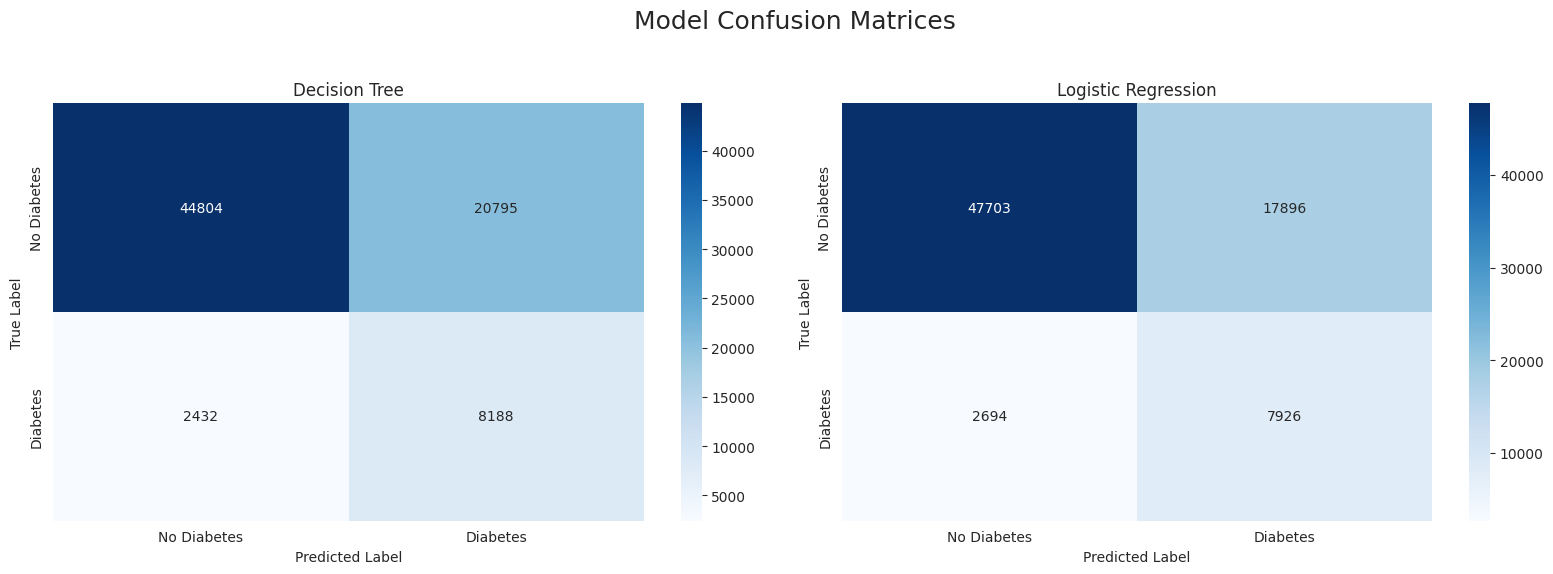


--- 8.2 Visualizing ROC Curves ---


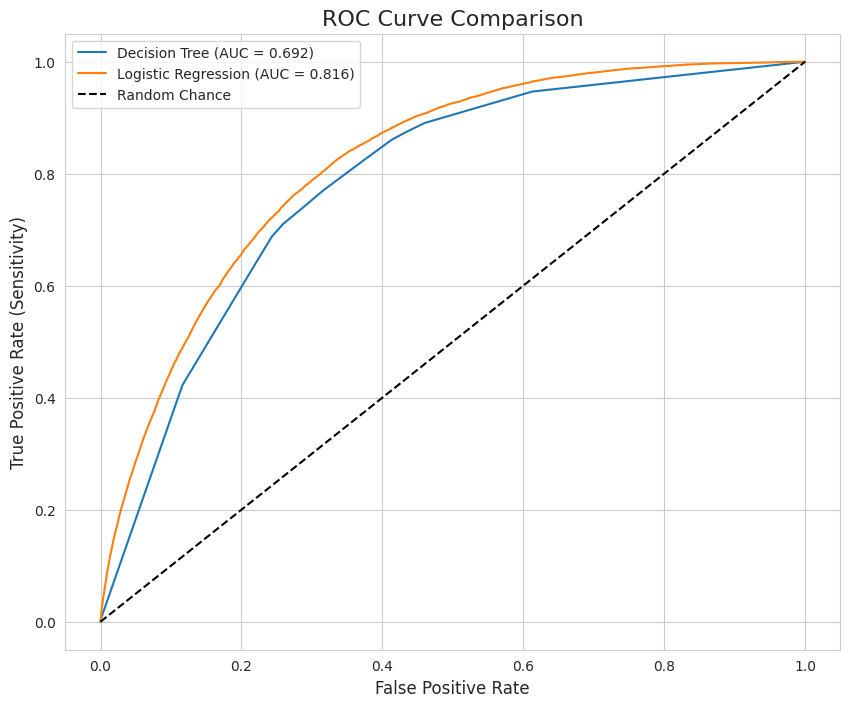


--- 8.3 Interpreting Feature Importance ---
Interpreting 8 categorical features and 5 PCA components.


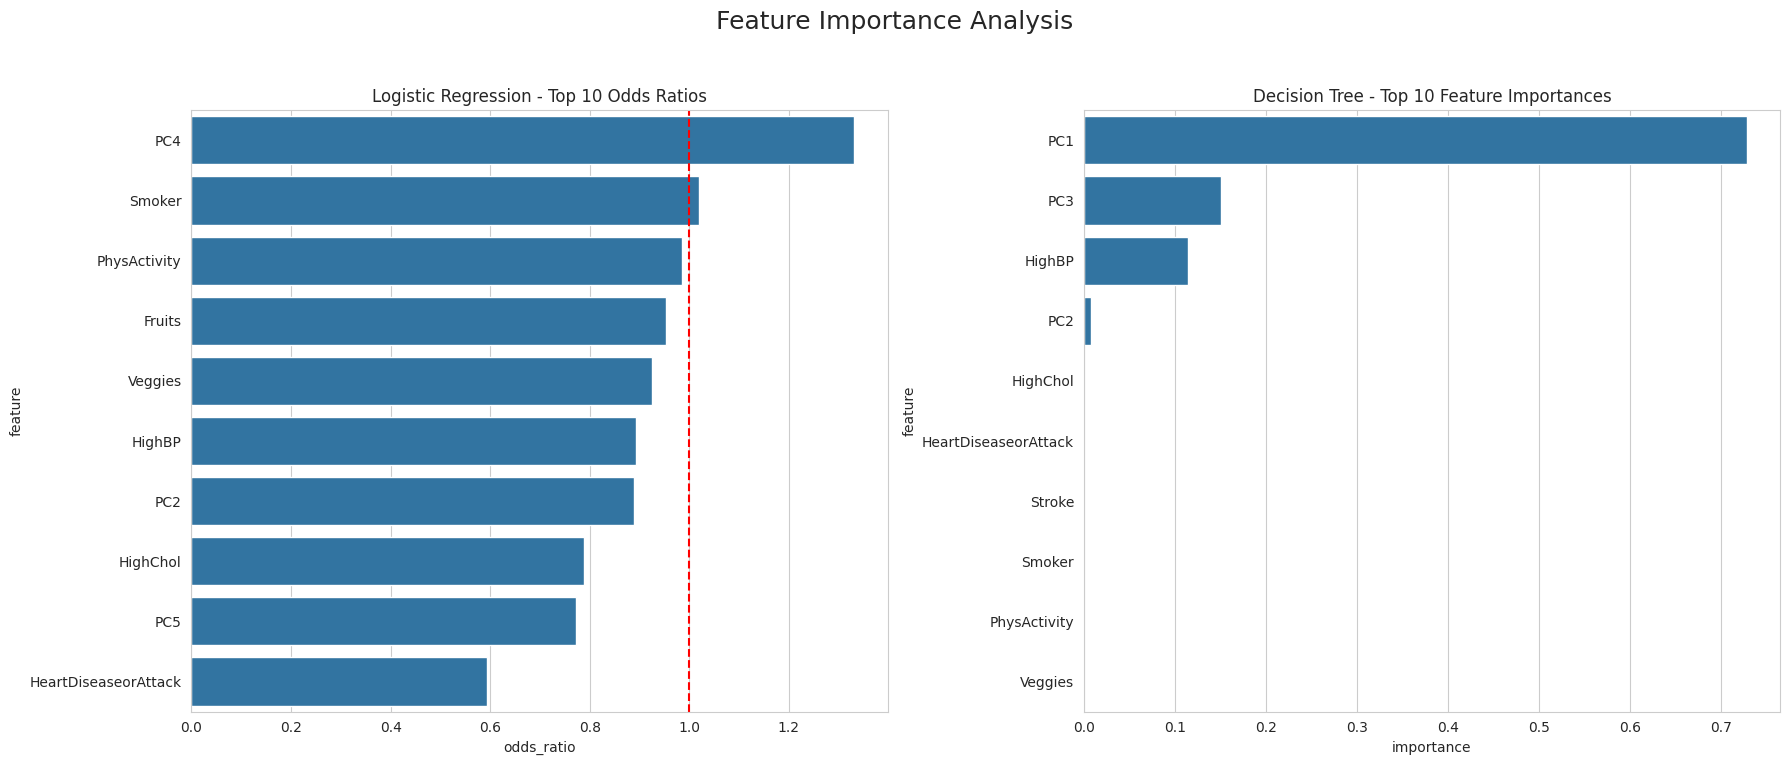


--- 8.4 Visualizing the Decision Tree Structure ---


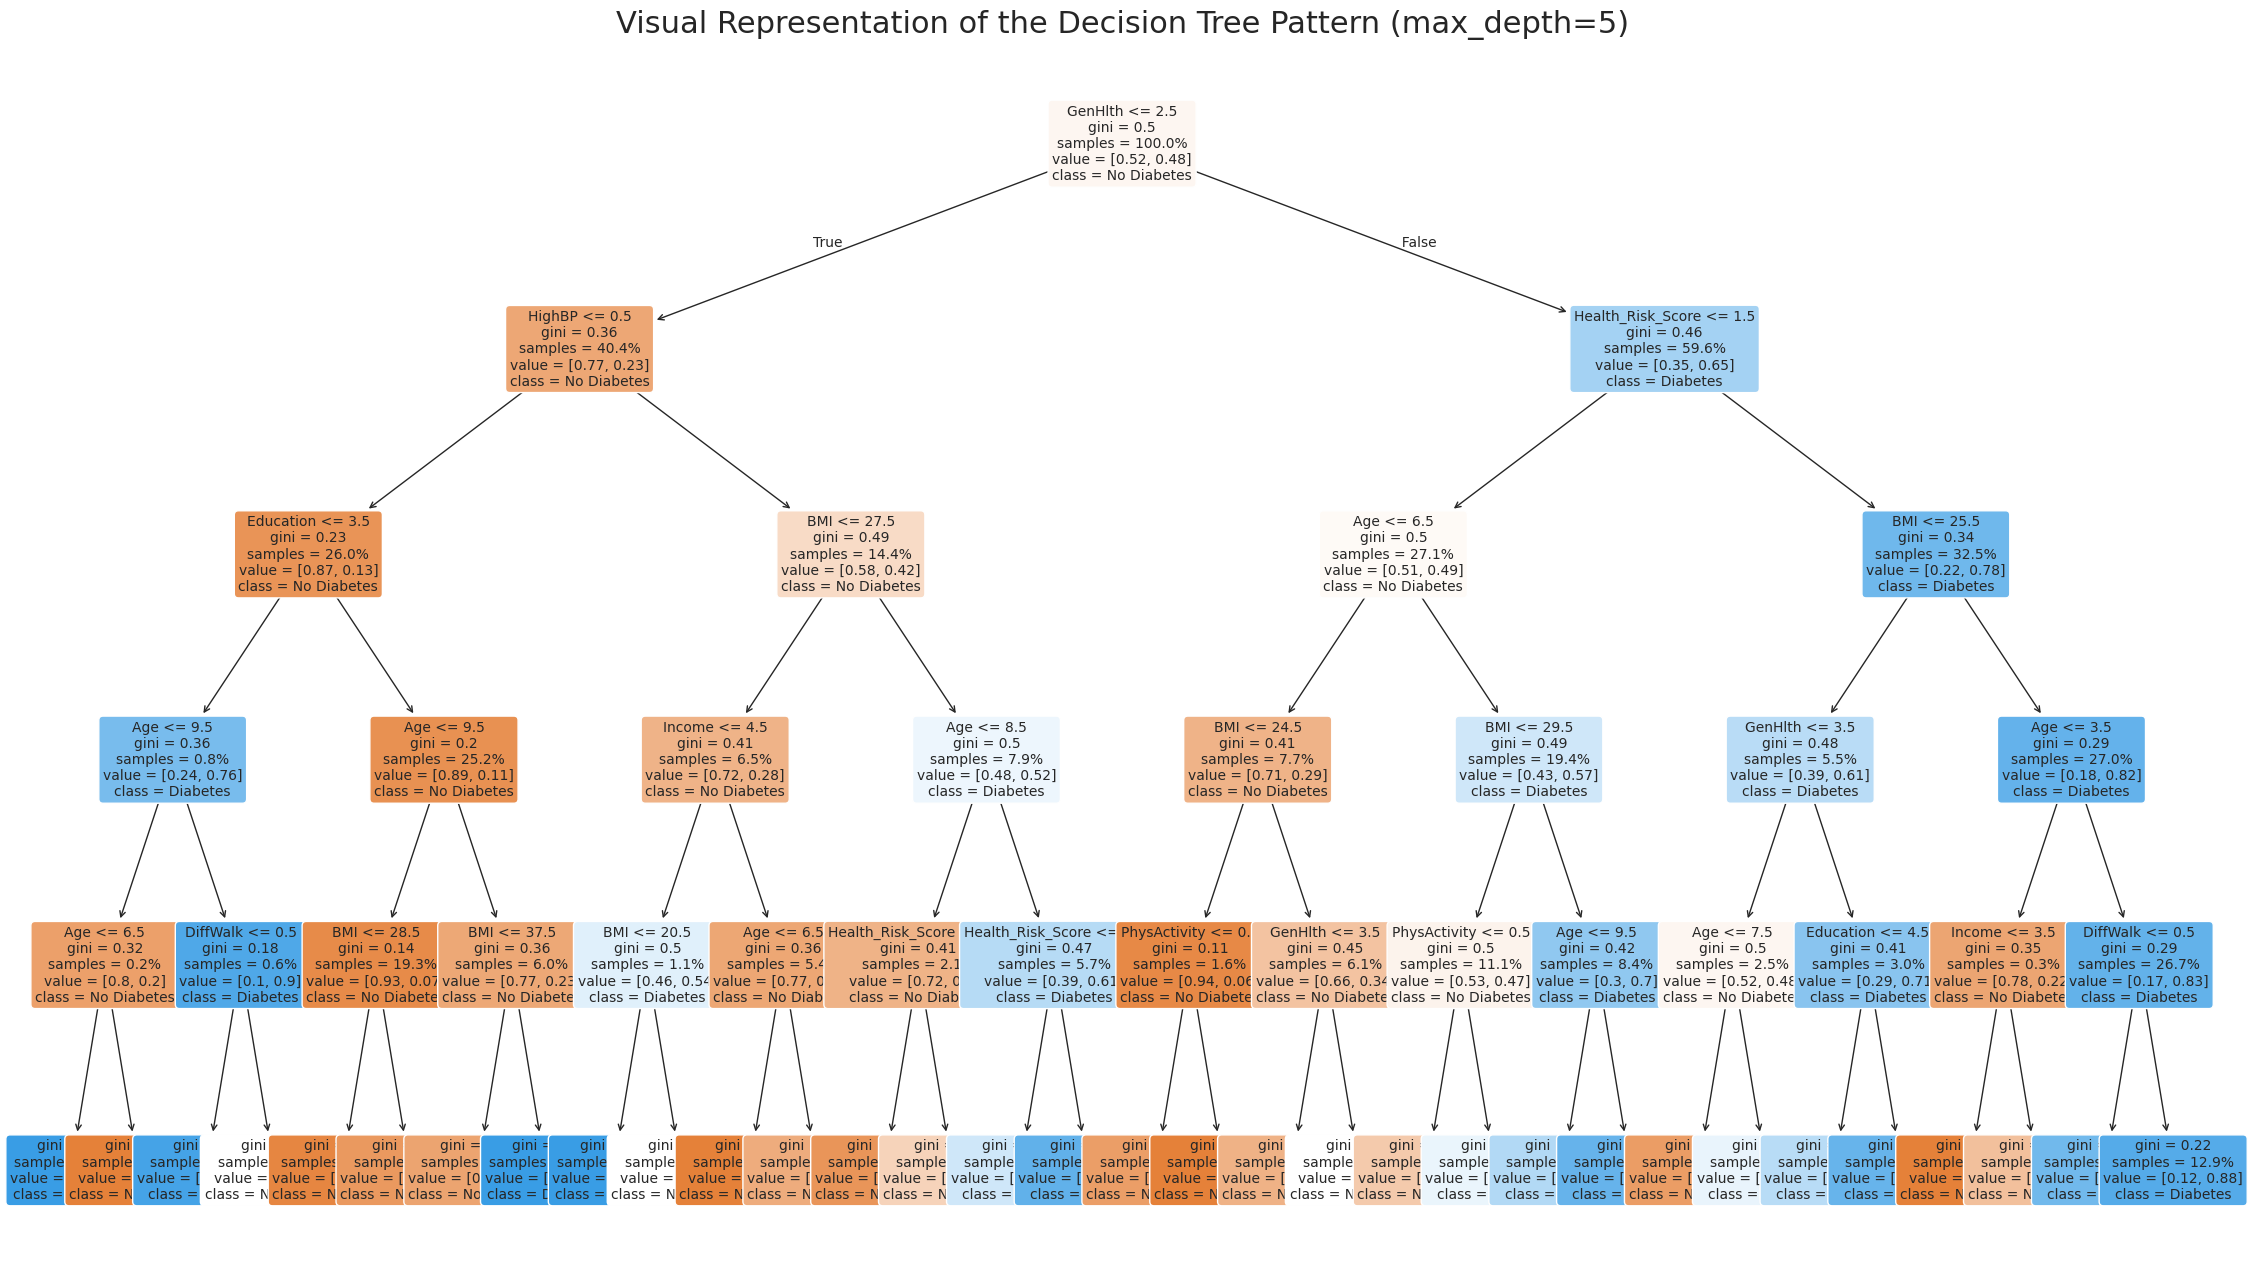

In [12]:
# 08-INT (Evaluation and Interpretation)

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.metrics import roc_curve

print("--- Step 8: Evaluation and Interpretation ---")

# --- 8.1 Visualizing Confusion Matrices ---
print("\n--- 8.1 Visualizing Confusion Matrices ---")

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Model Confusion Matrices', fontsize=18)

# Decision Tree Confusion Matrix
cm_dt_array = np.array([[tn, fp], [fn, tp]])
sns.heatmap(cm_dt_array, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Decision Tree')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')
axes[0].xaxis.set_ticklabels(['No Diabetes', 'Diabetes'])
axes[0].yaxis.set_ticklabels(['No Diabetes', 'Diabetes'])

# Logistic Regression Confusion Matrix
cm_lr_array = np.array([[tn_lr, fp_lr], [fn_lr, tp_lr]])
sns.heatmap(cm_lr_array, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('Logistic Regression')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')
axes[1].xaxis.set_ticklabels(['No Diabetes', 'Diabetes'])
axes[1].yaxis.set_ticklabels(['No Diabetes', 'Diabetes'])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


# --- 8.2 Visualizing ROC Curves ---
print("\n--- 8.2 Visualizing ROC Curves ---")

# For Logistic Regression, we can get ROC data directly from the model summary
roc_lr_pd = lr_model.summary.roc.toPandas()

# For Decision Tree, we need to collect the probability and label columns to the driver
# This is safe for a reasonably sized test set.
dt_probas = dt_predictions.select('label', 'probability').rdd.map(lambda row: (float(row['probability'][1]),
                                                                               float(row['label']))).collect()
y_true_dt = [item[1] for item in dt_probas]
y_proba_dt = [item[0] for item in dt_probas]
fpr_dt, tpr_dt, _ = roc_curve(y_true_dt, y_proba_dt)

# Plotting
plt.figure(figsize=(10, 8))
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_dt:.3f})')
plt.plot(roc_lr_pd['FPR'], roc_lr_pd['TPR'], label=f'Logistic Regression (AUC = {roc_auc_lr:.3f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.title('ROC Curve Comparison', fontsize=16)
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate (Sensitivity)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()


# --- 8.3 Interpreting Feature Importance ---
print("\n--- 8.3 Interpreting Feature Importance ---")

# 1. Get the number of PCA components
# The PCA model was the 5th stage in our pipeline (index 4)
pca_model_from_pipeline = pipeline_model.stages[4]
num_pca_components = pca_model_from_pipeline.getK()
pca_component_names = [f'PC{i+1}' for i in range(num_pca_components)]

# 2. Get the names of the selected categorical features
# The ChiSqSelector was the 2nd stage (index 1)
chi_sq_model_from_pipeline = pipeline_model.stages[1]
selected_indices = chi_sq_model_from_pipeline.selectedFeatures
# Note: This requires the 'categorical_features' list to be available from Step 4
selected_categorical_names = [categorical_features[i] for i in selected_indices]

# 3. Create the final feature_names list in the correct order
# The final_assembler combined them as ["selected_categorical_features", "pca_features"]
feature_names = selected_categorical_names + pca_component_names

print(f"Interpreting {len(selected_categorical_names)} categorical features and {num_pca_components} PCA components.")

# Decision Tree Feature Importances
dt_importances = dt_model.featureImportances.toArray()
dt_importance_df = pd.DataFrame({'feature': feature_names, 'importance': dt_importances}).sort_values('importance', ascending=False)

# Logistic Regression Coefficients (as Odds Ratios)
lr_coeffs = lr_model.coefficients.toArray()
odds_ratios = np.exp(lr_coeffs)
lr_coeffs_df = pd.DataFrame({'feature': feature_names, 'odds_ratio': odds_ratios}).sort_values('odds_ratio', ascending=False)


# Visualize Feature Importances
fig, axes = plt.subplots(1, 2, figsize=(18, 8))
fig.suptitle('Feature Importance Analysis', fontsize=18)

# Logistic Regression Odds Ratios Plot
sns.barplot(x='odds_ratio', y='feature', data=lr_coeffs_df.head(10), ax=axes[0])
axes[0].set_title('Logistic Regression - Top 10 Odds Ratios')
axes[0].axvline(x=1, color='red', linestyle='--')

# Decision Tree Feature Importance Plot
sns.barplot(x='importance', y='feature', data=dt_importance_df.head(10), ax=axes[1])
axes[1].set_title('Decision Tree - Top 10 Feature Importances')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# ==============================================================================
# 8.4 - Visualizing the Decision Tree Structure (to address feedback)
# ==============================================================================
# Import necessary libraries for the proxy model visualization
from sklearn.tree import DecisionTreeClassifier, plot_tree

print("\n--- 8.4 Visualizing the Decision Tree Structure ---")

# --- Step 1: Prepare a data sample for visualization ---
# We use a balanced sample from Iteration A ('df_balanced') because scikit-learn
# cannot run on a large, distributed Spark DataFrame. This sample is for illustrative purposes.
sample_fraction = 0.01 # Using 1% of the data for a clean plot
sample_for_plot_df = df_balanced.sample(withReplacement=False, fraction=sample_fraction, seed=42).toPandas()

# --- Step 2: Define features and target for the scikit-learn model ---
# This list should represent the final features that went into your PySpark model.
# It includes the original features that were later combined into PCA components
# and the selected categorical features. For clarity in the plot, we will use
# the original, interpretable names.
# NOTE: This list should align with the features used to build your final PySpark model.
feature_names_final = [
    'GenHlth', 'HighBP', 'BMI', 'Age', 'HighChol',
    'Health_Risk_Score', 'Symptom_Count', 'DiffWalk',
    'PhysActivity', 'Income', 'Education'
]

# Ensure all selected features are present in the sampled dataframe
# If any are missing due to sampling, this might raise an error.
X_plot = sample_for_plot_df[feature_names_final]
y_plot = sample_for_plot_df['Diabetes_binary']

# --- Step 3: Train a scikit-learn Decision Tree with the SAME parameters ---
# This acts as a proxy model to visually represent the logic of the main PySpark model.
proxy_tree = DecisionTreeClassifier(
    max_depth=5,       # CRITICAL: This MUST match the max_depth of your PySpark model
    random_state=42    # Ensures the visualization is reproducible
)
proxy_tree.fit(X_plot, y_plot)

# --- Step 4: Generate and display the visualization ---
plt.figure(figsize=(28, 16)) # Use a large figure size for readability
plot_tree(proxy_tree,
          filled=True,
          feature_names=feature_names_final,
          class_names=['No Diabetes', 'Diabetes'],
          rounded=True,
          fontsize=10,
          proportion=True, # Shows proportions instead of raw counts
          precision=2)

plt.title("Visual Representation of the Decision Tree Pattern (max_depth=5)", fontsize=22)
plt.show()




### Starting Iteration B: Undersampling ###

--- Starting Step 3 (Iteration B): Data Preparation ---

--- 3.5 Data Balancing (Undersampling on Training Data) ---
Class distribution in TRAINING data before balancing:
+---------------+------+
|Diabetes_binary| count|
+---------------+------+
|              1| 25046|
|              0|152935|
+---------------+------+

Training Minority count: 25046, Training Majority count: 152935

Class distribution in TRAINING data after UNDERSAMPLING:
+---------------+-----+
|Diabetes_binary|count|
+---------------+-----+
|              0|25146|
|              1|25046|
+---------------+-----+


--- 3.6 Applying Encoders and Cleaning ---
Recreating and sanitizing the 'Obesity' column for Iteration B...

--- Starting Step 4 (Iteration B): Data Transformation ---
Pipeline fitting for Iteration B complete. Transforming both sets...

--- Final Transformed Data (Iteration B) ---
+------------------------------------------------------------------------------

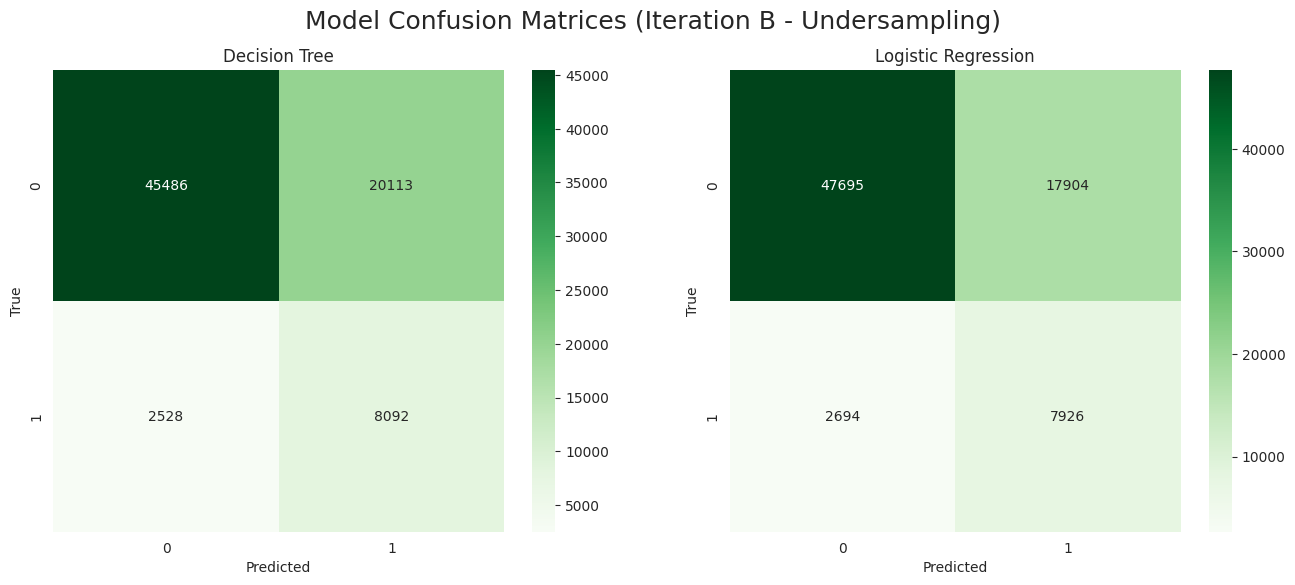


--- 8.3 Interpreting Feature Importance (Iteration B) ---


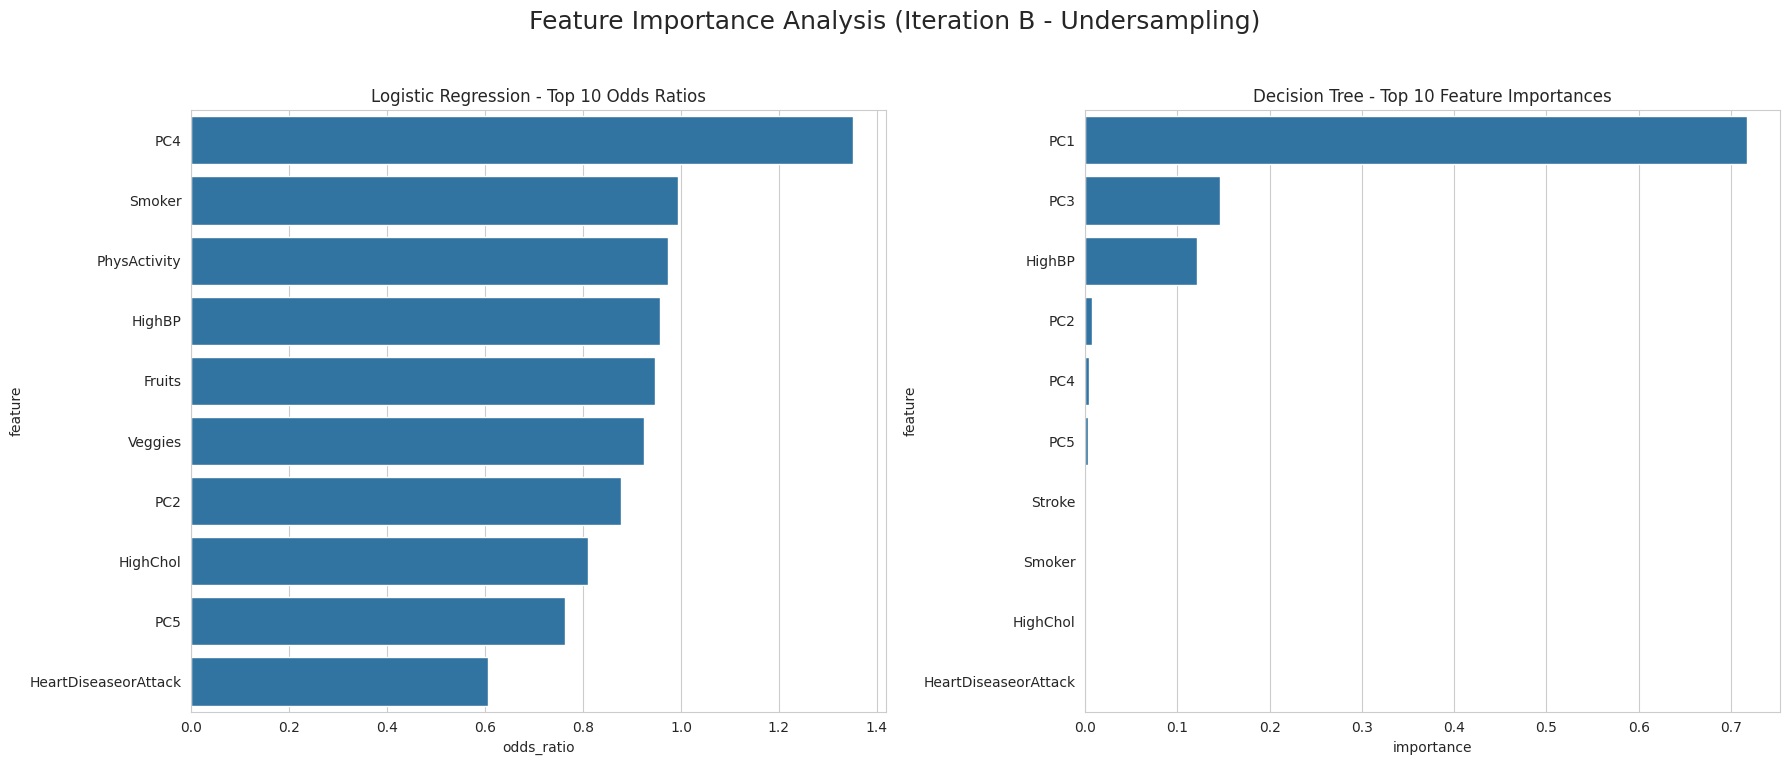

In [10]:
# =============================================================================
# =============================================================================
# ###################
# ##  Iteration B  ##
# ###################
# (UNDERSAMPLING)
# =============================================================================
# =============================================================================

print("\n\n" + "="*80)
print("### Starting Iteration B: Undersampling ###")
print("="*80 + "\n")


# =============================================================================
# Part 3 (Iteration B): Data Preparation
# =============================================================================
print("--- Starting Step 3 (Iteration B): Data Preparation ---")

# --- 3.5 Data Balancing (ITERATION B with UNDERSAMPLING on TRAINING DATA) ---
print("\n--- 3.5 Data Balancing (Undersampling on Training Data) ---")

# We use the SAME trainingData that was split in Iteration A for a fair comparison.
# We only change the balancing method.

print("Class distribution in TRAINING data before balancing:")
trainingData.groupBy('Diabetes_binary').count().show()

# Separate the majority and minority classes from the original training data
minority_df_train_b = trainingData.filter(col("Diabetes_binary") == 1)
majority_df_train_b = trainingData.filter(col("Diabetes_binary") == 0)

# Get the counts
minority_count_train_b = minority_df_train_b.count()
majority_count_train_b = majority_df_train_b.count()
print(f"Training Minority count: {minority_count_train_b}, Training Majority count: {majority_count_train_b}")

# Calculate the ratio for undersampling
if minority_count_train_b > 0 and majority_count_train_b > 0:
    undersample_ratio = minority_count_train_b / majority_count_train_b

    # Undersample the majority class WITHOUT replacement
    downsampled_majority_df = majority_df_train_b.sample(withReplacement=False, fraction=undersample_ratio, seed=42)

    # Combine the downsampled majority with the original minority to create the balanced set
    df_balanced_b = downsampled_majority_df.unionAll(minority_df_train_b)

    print("\nClass distribution in TRAINING data after UNDERSAMPLING:")
    df_balanced_b.groupBy('Diabetes_binary').count().show()
else:
    print("One class has no samples, skipping balancing.")
    df_balanced_b = trainingData

# --- 3.6 Final Preparation (Encoding) ---
# We use the same encoding and cleaning steps as Iteration A.
# The 'testData' remains unchanged from Iteration A.
print("\n--- 3.6 Applying Encoders and Cleaning ---")

# The StringIndexer and OneHotEncoder must be refit on the new balanced data
stringIndexer_b = StringIndexer(inputCol="BMI_Category", outputCol="BMI_Category_Index", handleInvalid="keep")
model_indexer_b = stringIndexer_b.fit(df_balanced_b)
df_indexed_train_b = model_indexer_b.transform(df_balanced_b)
df_indexed_test_b = model_indexer_b.transform(testData) # Use same test set

encoder_b = OneHotEncoder(inputCol="BMI_Category_Index", outputCol="BMI_Category_Vec", dropLast=True)
model_encoder_b = encoder_b.fit(df_indexed_train_b)
df_encoded_train_b = model_encoder_b.transform(df_indexed_train_b)
df_encoded_test_b = model_encoder_b.transform(df_indexed_test_b)

# Apply the same "rebuild" fix for the 'Obesity' column
print("Recreating and sanitizing the 'Obesity' column for Iteration B...")
df_encoded_train_b = df_encoded_train_b.withColumn("Obesity_clean", when(col("Obesity") == 1, 1).otherwise(0)).drop("Obesity").withColumnRenamed("Obesity_clean", "Obesity")
df_encoded_test_b = df_encoded_test_b.withColumn("Obesity_clean", when(col("Obesity") == 1, 1).otherwise(0)).drop("Obesity").withColumnRenamed("Obesity_clean", "Obesity")


# =============================================================================
# Part 4 (Iteration B): Data Transformation
# =============================================================================
print("\n--- Starting Step 4 (Iteration B): Data Transformation ---")

# We use the EXACT SAME pipeline definition as in Iteration A.
# The only difference is that we will .fit() it on our new undersampled training data.
# The feature lists (numerical_features, categorical_features) are assumed to be the same as defined in Iteration A's Step 4.

# Create and fit the full pipeline on the undersampled training data
pipeline_model_b = full_pipeline.fit(df_encoded_train_b)

print("Pipeline fitting for Iteration B complete. Transforming both sets...")

# Transform both the undersampled training data and the original test data
X_train_b = pipeline_model_b.transform(df_encoded_train_b).select("features", col("Diabetes_binary").alias("label"))
X_test_b = pipeline_model_b.transform(df_encoded_test_b).select("features", col("Diabetes_binary").alias("label"))

print("\n--- Final Transformed Data (Iteration B) ---")
X_train_b.show(5, truncate=False)


# =============================================================================
# Part 7 (Iteration B): Data Mining / Modeling
# =============================================================================
print("\n--- Starting Step 7 (Iteration B): Data Mining / Modeling ---")

model_results_b = {}

# --- 7.1 Decision Tree (Iteration B) ---
print("\n--- 7.1 Building and Evaluating Decision Tree (Iteration B) ---")
dt_b = DecisionTreeClassifier(featuresCol="features", labelCol="label", seed=42)
dt_model_b = dt_b.fit(X_train_b)
dt_predictions_b = dt_model_b.transform(X_test_b)

# --- 7.2 Logistic Regression (Iteration B) ---
print("\n--- 7.2 Building and Evaluating Logistic Regression (Iteration B) ---")
lr_b = LogisticRegression(featuresCol="features", labelCol="label")
lr_model_b = lr_b.fit(X_train_b)
lr_predictions_b = lr_model_b.transform(X_test_b)

# =============================================================================
# Part 8 (Iteration B): Evaluation and Interpretation
# =============================================================================
print("\n--- Starting Step 8 (Iteration B): Evaluation and Interpretation ---")

# --- 8.0 Evaluation Metrics Calculation (Iteration B) ---
# --- Decision Tree Evaluation ---
evaluator_multi_b = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction")
evaluator_binary_b = BinaryClassificationEvaluator(labelCol="label", rawPredictionCol="rawPrediction", metricName="areaUnderROC")

accuracy_dt_b = evaluator_multi_b.setMetricName("accuracy").evaluate(dt_predictions_b)
f1_dt_b = evaluator_multi_b.setMetricName("f1").evaluate(dt_predictions_b)
recall_dt_b = evaluator_multi_b.setMetricName("weightedRecall").evaluate(dt_predictions_b)
roc_auc_dt_b = evaluator_binary_b.evaluate(dt_predictions_b)

tp_b = dt_predictions_b.filter("prediction = 1 AND label = 1").count()
tn_b = dt_predictions_b.filter("prediction = 0 AND label = 0").count()
fp_b = dt_predictions_b.filter("prediction = 1 AND label = 0").count()
fn_b = dt_predictions_b.filter("prediction = 0 AND label = 1").count()
specificity_dt_b = tn_b / (tn_b + fp_b) if (tn_b + fp_b) > 0 else 0

model_results_b['Decision Tree'] = {'Accuracy': accuracy_dt_b, 'Sensitivity (Recall)': recall_dt_b, 'Specificity': specificity_dt_b, 'F1-Score': f1_dt_b, 'AUC-ROC': roc_auc_dt_b}

# --- Logistic Regression Evaluation ---
accuracy_lr_b = evaluator_multi_b.setMetricName("accuracy").evaluate(lr_predictions_b)
f1_lr_b = evaluator_multi_b.setMetricName("f1").evaluate(lr_predictions_b)
recall_lr_b = evaluator_multi_b.setMetricName("weightedRecall").evaluate(lr_predictions_b)
roc_auc_lr_b = evaluator_binary_b.evaluate(lr_predictions_b)

tp_lr_b = lr_predictions_b.filter("prediction = 1 AND label = 1").count()
tn_lr_b = lr_predictions_b.filter("prediction = 0 AND label = 0").count()
fp_lr_b = lr_predictions_b.filter("prediction = 1 AND label = 0").count()
fn_lr_b = lr_predictions_b.filter("prediction = 0 AND label = 1").count()
specificity_lr_b = tn_lr_b / (tn_lr_b + fp_lr_b) if (tn_lr_b + fp_lr_b) > 0 else 0

model_results_b['Logistic Regression'] = {'Accuracy': accuracy_lr_b, 'Sensitivity (Recall)': recall_lr_b, 'Specificity': specificity_lr_b, 'F1-Score': f1_lr_b, 'AUC-ROC': roc_auc_lr_b}

# --- 8.1 Summary of Model Performance (Iteration B) ---
print("\n--- 8.1 Summary of Model Performance (Iteration B) ---")
results_df_b = pd.DataFrame(model_results_b).T
print(results_df_b.round(4))


# --- 8.2 Visualizing Confusion Matrices (Iteration B) ---
print("\n--- 8.2 Visualizing Confusion Matrices (Iteration B) ---")
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Model Confusion Matrices (Iteration B - Undersampling)', fontsize=18)
cm_dt_b_array = np.array([[tn_b, fp_b], [fn_b, tp_b]])
sns.heatmap(cm_dt_b_array, annot=True, fmt='d', cmap='Greens', ax=axes[0])
axes[0].set_title('Decision Tree')
axes[0].set_xlabel('Predicted'); axes[0].set_ylabel('True')
cm_lr_b_array = np.array([[tn_lr_b, fp_lr_b], [fn_lr_b, tp_lr_b]])
sns.heatmap(cm_lr_b_array, annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title('Logistic Regression')
axes[1].set_xlabel('Predicted'); axes[1].set_ylabel('True')
plt.show()


# --- 8.3 Interpreting Feature Importance (Iteration B) ---
print("\n--- 8.3 Interpreting Feature Importance (Iteration B) ---")

# Extract feature names from the new pipeline model for Iteration B
pca_model_from_pipeline_b = pipeline_model_b.stages[4]
num_pca_components_b = pca_model_from_pipeline_b.getK()
pca_component_names_b = [f'PC{i+1}' for i in range(num_pca_components_b)]

chi_sq_model_from_pipeline_b = pipeline_model_b.stages[1]
selected_indices_b = chi_sq_model_from_pipeline_b.selectedFeatures
selected_categorical_names_b = [categorical_features[i] for i in selected_indices_b]

feature_names_b = selected_categorical_names_b + pca_component_names_b

# Decision Tree Importances
dt_importances_b = dt_model_b.featureImportances.toArray()
dt_importance_df_b = pd.DataFrame({'feature': feature_names_b, 'importance': dt_importances_b}).sort_values('importance', ascending=False)

# Logistic Regression Coefficients
lr_coeffs_b = lr_model_b.coefficients.toArray()
odds_ratios_b = np.exp(lr_coeffs_b)
lr_coeffs_df_b = pd.DataFrame({'feature': feature_names_b, 'odds_ratio': odds_ratios_b}).sort_values('odds_ratio', ascending=False)

# Visualize Feature Importances
fig, axes = plt.subplots(1, 2, figsize=(18, 8))
fig.suptitle('Feature Importance Analysis (Iteration B - Undersampling)', fontsize=18)
sns.barplot(x='odds_ratio', y='feature', data=lr_coeffs_df_b.head(10), ax=axes[0]).set_title('Logistic Regression - Top 10 Odds Ratios')
sns.barplot(x='importance', y='feature', data=dt_importance_df_b.head(10), ax=axes[1]).set_title('Decision Tree - Top 10 Feature Importances')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()



### Comparative Analysis of Oversampling vs. Undersampling ###

--- Combined Performance Metrics Table ---
    Balancing Method                Model  Accuracy  F1-Score  \
0   Oversampling (A)        Decision Tree    0.6953    0.7411   
1   Oversampling (A)  Logistic Regression    0.7299    0.7685   
2  Undersampling (B)        Decision Tree    0.7029    0.7472   
3  Undersampling (B)  Logistic Regression    0.7298    0.7684   

   Sensitivity (Recall)  Specificity  AUC-ROC  
0                0.6953       0.6830   0.6923  
1                0.7299       0.7272   0.8155  
2                0.7029       0.6934   0.6852  
3                0.7298       0.7271   0.8153  

--- Visualizing Comparison of Model Performance ---


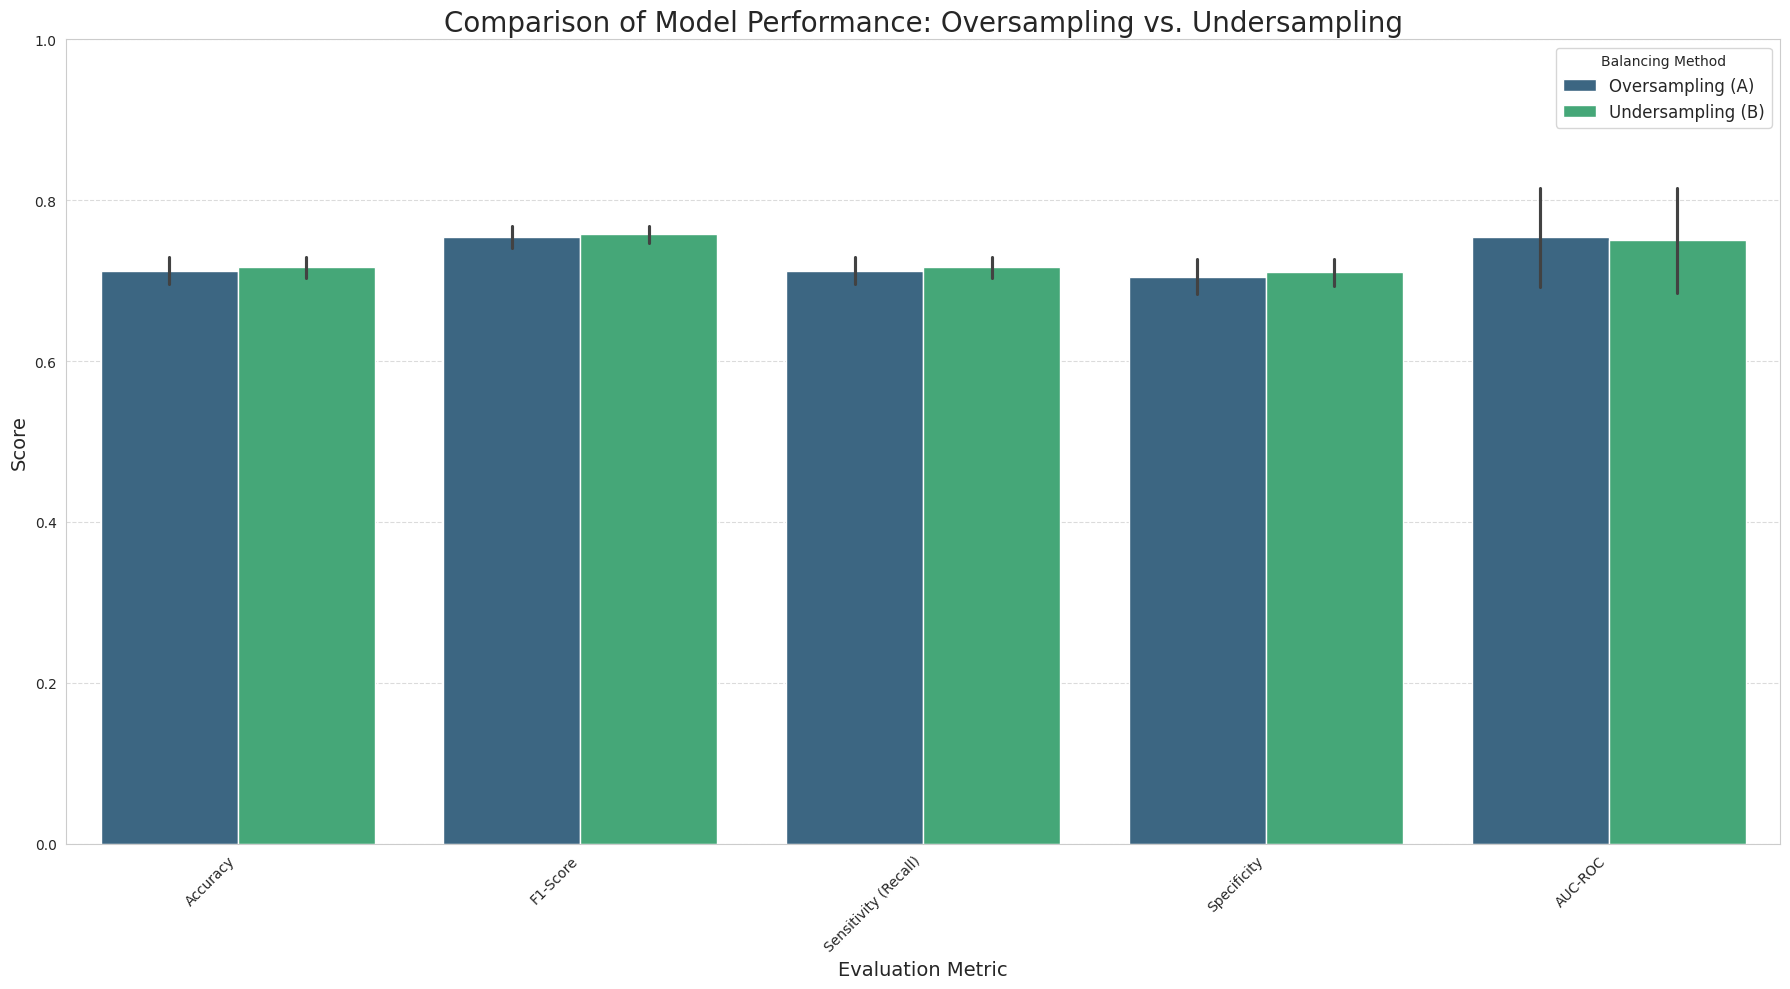

In [11]:
# =============================================================================
# Comparative Analysis of Iteration A vs. Iteration B
# =============================================================================
print("\n" + "="*80)
print("### Comparative Analysis of Oversampling vs. Undersampling ###")
print("="*80 + "\n")

# --- 1. Consolidate Results into a Single DataFrame ---

# Add a column to each results DataFrame to identify the balancing method
results_df['Balancing Method'] = 'Oversampling (A)'
results_df_b['Balancing Method'] = 'Undersampling (B)'

# Combine the two DataFrames
comparison_df = pd.concat([results_df, results_df_b])

# Re-organize columns for better readability
comparison_df = comparison_df.reset_index().rename(columns={'index': 'Model'})
comparison_df = comparison_df[['Balancing Method', 'Model', 'Accuracy', 'F1-Score',
                               'Sensitivity (Recall)', 'Specificity', 'AUC-ROC']]

print("--- Combined Performance Metrics Table ---")
print(comparison_df.round(4))


# --- 2. Visualize the Comparison ---
print("\n--- Visualizing Comparison of Model Performance ---")

# Melt the DataFrame to make it suitable for plotting with Seaborn
df_melted = comparison_df.melt(id_vars=['Balancing Method', 'Model'],
                               var_name='Metric',
                               value_name='Score')

# Create the grouped bar plot
plt.figure(figsize=(18, 10))
sns.barplot(data=df_melted, x='Metric', y='Score', hue='Balancing Method', palette='viridis')

plt.title('Comparison of Model Performance: Oversampling vs. Undersampling', fontsize=20)
plt.ylabel('Score', fontsize=14)
plt.xlabel('Evaluation Metric', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1.0) # Scores are typically between 0 and 1
plt.legend(title='Balancing Method', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()